<a href="https://colab.research.google.com/github/itsvipa/ctm-codebar-nov-22-planning/blob/main/Copy_of_codebar_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for Living (Python for Data Engineering)

In this session we’ll be taking a look at harnessing the power of data to aid decision making for things like groceries and everyday purchases. We’ll get hands on with sourcing and making sense of the data, and then using it to answer some interesting questions, using techniques from fields like optimisation and machine learning.

The goal of this exercise is to you python libraries like pandas, do the following:

## Before you start:

Run the command below to download the data needed for this exercise; There should be three .csv files downloaded: uk_products.csv and products.csv and prices.csv

In [1]:
!git clone https://github.com/itsvipa/ctm-codebar-nov-22-planning.git

fatal: destination path 'ctm-codebar-nov-22-planning' already exists and is not an empty directory.


In [2]:
import pandas as pd

### Task One - Find cheapest supermarket for shopping basket?:

In the last decade, the average shopping basket has increased by {insert percentage}. Using the data pulled from GitHub, find the the cheapest overall supermarket for the basket provided below. 

In [42]:
basket = [
    [28798, "Tetley Original Tea Bags x240"], 
    [34398, "Cravendale Whole Milk"],
    [30904, "Kellogg's Rice Krispies"],
    [26457,	"Tropicana Pineapple Juice"],
    [28095, "Diet Coke Bottles"],
    [33442, "Loyd Grossman Tomato & Basil Pasta Sauce"],
    [27161,	"Strings & Things Cheestrings Cheese Snack"],
    [31863,	"Mars 4 pack Ice Cream Bars"],
    [32002,	"Tilda Microwave Coconut Basmati Rice"],
    [86547,	"Knorr Chicken Stock Pot 4 Pack"],
    [84095,	"Arla skyr Fat Free Natural Yogurt"],
    [33255,	"Alpro Almond Long Life Drink"],
    [43809,	"Energizer Max 9V Batteries"],
    [25828,	"Robinsons Crushed Lime & Mint Fruit Cordial"],
    [32248,	"Sensations Balsamic Vinegar & Caramelised Onion Sharing Crisps"],
    [47361,	"Lynx Africa Body Spray Deodorant Aerosol"],
    [32774,	"Heinz Spaghetti"],
    [92101,	"Chicago Town Cheese Pizza Tomato Stuffed Crust Takeaway"],
    [110105, "McCain Home Chips Straight"],
    [44797,	"Fairy Original Washing Up Liquid"],
    [40915,	"Fairy Non Bio Washing Liquid for Sensitive Skin 1.33L 38 Washes	"],
    [24091,	"Nissin Soba Yakitori Noodles"],
    [42002,	"Yakult Yogurt Drink"],	
    [83092,	"Jammie Dodgers"],
    [20272,	"Quorn Vegan Chicken Free Slices 100G"],	
    [33492,	"Linda McCartney's Mozzarella Quarter Pounder Burger"],
    [51657,	"Purina ONE Adult Dry Cat Food Chicken & Wholegrains"],
    [24341,	"Birds Eye 4 Original Beef Burgers With Onions"],
    [109986, "Cathedral City Lighter Mature Cheese"],
    [27526,	"Filippo Berio Mild & Light Olive Oil"],
    [45238, "Bfree Pitta Breads Stone Baked Pittas"]
    ]

print(len(basket))

31


In [43]:
product_df = pd.read_csv("/content/ctm-codebar-nov-22-planning/products.csv")
price_df = pd.read_csv("/content/ctm-codebar-nov-22-planning/prices.csv")

In [44]:
product_df

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count
0,20100,Lucozade Sport Orange,NaN,750,ml,"['302012236', '50368011', '1000273982470']",1
1,20101,Red Bull Sugarfree,NaN,473,ml,"['298026024', '7922076', '576040011']",3
2,20102,All Shook Up Spritz Pink Grapefruit & Lavender...,NaN,NaN,NaN,['305986034'],0
3,20103,Gatorade Orange 500ml,NaN,NaN,NaN,"['287043066', '8008530']",0
4,20104,Purdeys Rejuvenation Fruit Drink 330Ml,NaN,330,ml,"['272855015', '7720116', '14533011', '34395901...",3
...,...,...,...,...,...,...,...
81665,149214,TRIP CBD Infused Elderflower Mint,NaN,250,ml,"['8040121', '563191011']",2
81666,149215,TRIP CBD Infused Lemon Basil,NaN,250,ml,"['8040125', '563190011']",2
81667,149216,TRIP CBD Infused Peach Ginger,NaN,250,ml,"['8040137', '563192011']",2
81668,149596,Smirnoff Red Label Vodka 35cl,NaN,350,ml,"['256554689', '2412368', '119513011']",2


In [45]:
price_df

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
0,20100,Lucozade Sport Orange,asda,True,1.25,0.17,100.0,ml,2022-10-26T15:00:00.000Z
1,20101,Red Bull Sugarfree,morrisons,True,2.30,0.49,100.0,ml,2022-10-26T18:00:00.000Z
2,20101,Red Bull Sugarfree,sainsburys,True,2.30,0.49,100.0,ml,2022-10-26T11:00:00.000Z
3,20101,Red Bull Sugarfree,tesco,False,3.40,0.49,100.0,ml,2022-10-26T14:00:00.000Z
4,20104,Purdeys Rejuvenation Fruit Drink 330Ml,sainsburys,True,1.40,0.42,100.0,ml,2022-10-26T12:00:00.000Z
...,...,...,...,...,...,...,...,...,...
94855,149216,TRIP CBD Infused Peach Ginger,ocado,True,2.00,0.80,100.0,ml,2022-10-26T14:00:00.000Z
94856,149216,TRIP CBD Infused Peach Ginger,sainsburys,True,2.00,0.80,100.0,ml,2022-10-26T12:00:00.000Z
94857,149596,Smirnoff Red Label Vodka 35cl,tesco,True,10.00,2.86,100.0,ml,2022-10-26T10:00:00.000Z
94858,149596,Smirnoff Red Label Vodka 35cl,sainsburys,True,10.50,3.00,100.0,ml,2022-10-26T11:00:00.000Z


In [46]:
basket_ids = [i[0] for i in basket]
product_basket = product_df[product_df['id'].isin(basket_ids)]
product_basket

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count
171,20272,Quorn Vegan Chicken Free Slices 100G,NaN,100,g,"['1000036534591', '409621011', '300544928', '7...",7
3920,24091,Nissin Soba Yakitori Noodles,NaN,89,g,"['7880330', '358649011', '394012011', '9100030...",7
4157,24341,Birds Eye 4 Original Beef Burgers With Onions,NaN,227,g,"['39291', '111245011', '254750569', '7062745',...",7
5577,25828,Robinsons Crushed Lime & Mint Fruit Cordial,NaN,500,ml,"['298026060', '7893476', '1000000581841', '395...",7
6168,26457,Tropicana Pineapple Juice,NaN,850,ml,"['287294534', '910001811525', '7736698', '2807...",7
6829,27161,Strings & Things Cheestrings Cheese Snack,8.0,160,g,"['910000563392', '111504011', '273196994', '75...",8
7170,27526,Filippo Berio Mild & Light Olive Oil,NaN,500,ml,"['3817506', '33508011', '112993011', '25495826...",7
7700,28095,Diet Coke Bottles,NaN,1000,ml,"['252047858', '3723975', '20947011', '11392001...",7
8338,28798,Tetley Original Tea Bags x240,240.0,750,g,"['256093024', '3124932', '113676011', '32744',...",8
10318,30904,Kellogg's Rice Krispies,NaN,700,g,"['910000396129', '7427688', '112094011', '2681...",7


In [47]:
basket_prices = price_df[price_df['id'].isin(basket_ids)]
basket_prices

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
307,20272,Quorn Vegan Chicken Free Slices 100G,morrisons,True,2.39,2.390,100.0,g,2022-10-26T15:00:00.000Z
308,20272,Quorn Vegan Chicken Free Slices 100G,asda,True,2.40,2.400,100.0,g,2022-10-26T14:00:00.000Z
309,20272,Quorn Vegan Chicken Free Slices 100G,coop,NaN,2.40,NaN,NaN,NaN,2022-10-26T11:00:00.000Z
310,20272,Quorn Vegan Chicken Free Slices 100G,ocado,True,2.40,2.400,100.0,g,2022-10-26T09:00:00.000Z
311,20272,Quorn Vegan Chicken Free Slices 100G,sainsburys,True,2.40,2.400,100.0,g,2022-10-26T10:00:00.000Z
312,20272,Quorn Vegan Chicken Free Slices 100G,tesco,True,2.40,2.400,100.0,g,2022-10-26T14:00:00.000Z
313,20272,Quorn Vegan Chicken Free Slices 100G,waitrose,True,2.50,2.500,100.0,g,2022-10-26T12:00:00.000Z
7494,24091,Nissin Soba Yakitori Noodles,asda,True,1.50,1.670,100.0,g,2022-10-26T10:00:00.000Z
7495,24091,Nissin Soba Yakitori Noodles,coop,NaN,1.50,NaN,NaN,NaN,2022-10-25T09:00:00.000Z
7496,24091,Nissin Soba Yakitori Noodles,sainsburys,True,1.50,1.690,100.0,g,2022-10-26T11:00:00.000Z


In [50]:
basket_prices['retailer'].unique()

array(['morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco',
       'waitrose', 'aldi'], dtype=object)

In [51]:
basket_prices.groupby(['retailer']).count()

,id,name,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
retailer,,,,,,,,
aldi,3,3,3,3,3,3,3,3
asda,31,31,31,31,31,31,31,31
coop,31,31,0,31,0,0,0,31
morrisons,31,31,31,31,31,31,31,31
ocado,31,31,31,31,31,31,31,31
sainsburys,31,31,31,31,31,31,31,31
tesco,31,31,31,31,31,31,31,31
waitrose,31,31,31,31,31,31,31,31


In [54]:
retailers_to_test = ['morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco', 'waitrose']

compare_price_basket = basket_prices[basket_prices['retailer'].isin(retailers_to_test)]

compare_price_basket.sort_values('price').drop_duplicates(['id'])

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
63079,83092,Jammie Dodgers,waitrose,True,0.50,0.360,100.0,g,2022-10-26T10:00:00.000Z
24674,32774,Heinz Spaghetti,sainsburys,True,0.85,0.210,100.0,g,2022-10-26T11:00:00.000Z
23037,32002,Tilda Microwave Coconut Basmati Rice,asda,True,0.95,0.380,100.0,g,2022-10-26T10:00:00.000Z
65383,86547,Knorr Chicken Stock Pot 4 Pack,tesco,True,1.19,1.070,100.0,g,2022-10-26T14:00:00.000Z
15737,28095,Diet Coke Bottles,coop,NaN,1.25,NaN,NaN,NaN,2022-10-26T10:00:00.000Z
63699,84095,Arla skyr Fat Free Natural Yogurt,asda,True,1.25,0.280,100.0,g,2022-10-26T12:00:00.000Z
7496,24091,Nissin Soba Yakitori Noodles,sainsburys,True,1.50,1.690,100.0,g,2022-10-26T11:00:00.000Z
26181,33442,Loyd Grossman Tomato & Basil Pasta Sauce,asda,True,1.50,0.430,100.0,g,2022-10-26T09:00:00.000Z
26256,33492,Linda McCartney's Mozzarella Quarter Pounder B...,tesco,True,1.50,1.100,100.0,g,2022-10-26T08:00:00.000Z
22797,31863,Mars 4 pack Ice Cream Bars,sainsburys,True,1.75,0.860,100.0,ml,2022-10-26T11:00:00.000Z


In [58]:
compare_price_basket.groupby('retailer').sum()['price']

retailer
asda          80.98
coop          96.20
morrisons     87.31
ocado         92.70
sainsburys    80.65
tesco         81.38
waitrose      95.75
Name: price, dtype: float64

### Task Two - How much more can you save if you split the basket between supermarkets (2 stores, 3 stores)?

NOTE - Should this actually be the first task, I feel like this is simpler/a nice way two each them into iteration. 

In [61]:
import itertools

retailer_pairs = itertools.combinations(retailers_to_test, 2)

def get_cheapest_basket(retailer_list):
  retailer_price_basket = compare_price_basket[compare_price_basket['retailer'].isin(retailer_list)]
  return retailer_price_basket.sort_values('price').drop_duplicates(['id'])['price'].sum()

pair_basket_prices = [[r, get_cheapest_basket(r)] for r in retailer_pairs]
pair_basket_prices

[[('morrisons', 'asda'), 78.6],
 [('morrisons', 'coop'), 83.54],
 [('morrisons', 'ocado'), 82.46],
 [('morrisons', 'sainsburys'), 77.03],
 [('morrisons', 'tesco'), 78.51],
 [('morrisons', 'waitrose'), 84.04],
 [('asda', 'coop'), 77.68],
 [('asda', 'ocado'), 78.93],
 [('asda', 'sainsburys'), 77.44],
 [('asda', 'tesco'), 76.66],
 [('asda', 'waitrose'), 80.13],
 [('coop', 'ocado'), 86.14999999999999],
 [('coop', 'sainsburys'), 78.6],
 [('coop', 'tesco'), 79.48000000000002],
 [('coop', 'waitrose'), 87.29999999999998],
 [('ocado', 'sainsburys'), 79.14999999999999],
 [('ocado', 'tesco'), 79.48],
 [('ocado', 'waitrose'), 90.1],
 [('sainsburys', 'tesco'), 76.53],
 [('sainsburys', 'waitrose'), 80.15],
 [('tesco', 'waitrose'), 79.98]]

In [82]:
def get_cheapest_store_combination(store_size):
  retailer_combinations = itertools.combinations(retailers_to_test, store_size)
  cheapest_stores = None
  cheapest_price = None
  for rc in retailer_combinations:
    current_price = get_cheapest_basket(rc)
    if not cheapest_price or current_price < cheapest_price:
      cheapest_stores = rc
      cheapest_price = current_price
  return cheapest_stores, cheapest_price

In [68]:
# Step Two: Find the top two cheapest supermarkets and for your basket of items
get_cheapest_store_combination(2)

(('sainsburys', 'tesco'), 76.53)

In [69]:
get_cheapest_store_combination(3)

(('morrisons', 'sainsburys', 'tesco'), 74.77000000000001)

In [70]:
get_cheapest_store_combination(4)

(('morrisons', 'asda', 'sainsburys', 'tesco'), 73.06)

In [71]:
get_cheapest_store_combination(5)

(('morrisons', 'asda', 'ocado', 'sainsburys', 'tesco'), 72.56)

In [72]:
get_cheapest_store_combination(6)

(('morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco'), 72.51)

In [73]:
get_cheapest_store_combination(7)

(('morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco', 'waitrose'),
 72.51)

In [85]:
x_data = range(1,8)
y_data = [get_cheapest_store_combination(num_of_stores)[1] for num_of_stores in x_data]

In [86]:
y_data

[80.64999999999999, 76.53, 74.77000000000001, 73.06, 72.56, 72.51, 72.51]

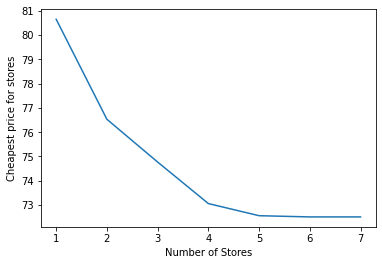

In [90]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.xlabel('Number of Stores')
plt.ylabel('Cheapest price for stores')
plt.show()

### Task Three (Optional) - Using a second dataset, come up with a cheaper basket that is also nutritionally beneficial

First, lets load in and match up the data

In [91]:
!pip install py-stringsimjoin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.0 MB/s 
     |████████████████████████████████| 661 kB 42.2 MB/s 
  Created wheel for py-stringsimjoin: filename=py_stringsimjoin-0.3.2-cp37-cp37m-linux_x86_64.whl size=3724106 sha256=fc622b548bc1505d89759a7fb4d0261ab0ca5dfc64faf920cac564b0b9171a6e
  Stored in directory: /root/.cache/pip/wheels/7c/0d/a4/c0a779a4d196bed8ed41ca12be09a93e158e4fc974b59f9fd5
  Created wheel for py-stringmatching: filename=py_stringmatching-0.4.2-cp37-cp37m-linux_x86_64.whl size=2055558 sha256=e70acd1a978be699393d3f19a3d9428b2b306040bb1d3c0102dbadcccc95dc14
  Stored in directory: /root/.cache/pip/wheels/7e/12/86/46f9378ae730550dd2f89cad50880e70d66cabedd90074f2d2
Successfully built py-stringsimjoin py-stringmatching


In [92]:
import py_stringsimjoin as ssj
import py_stringmatching as sm

In [95]:
nutrition_df = pd.read_csv('/content/ctm-codebar-nov-22-planning/nutrition_small.csv.gz')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [96]:
nutrition_df

,Unnamed: 0,_id,product_name,compared_to_category,categories_tags,categories,categories_hierarchy,_keywords,nutriments.fat_100g,nutriments.proteins_100g,nutriments.sugars_100g,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr
0,2,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,"[""whole"",""sweetened"",""chip"",""banana""]",28.570000,3.570000,14.290000,0.000000,536.000000,64.290000,NaN,NaN,"[""en:united-states""]",2
1,3,4559,Peanuts,NaN,NaN,NaN,NaN,"[""glasser"",""torn"",""peanut""]",17.860000,17.860000,17.860000,0.635000,464.000000,60.710000,NaN,NaN,"[""en:united-states""]",3
2,4,16087,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,"[""grizzlie"",""organic"",""nut"",""mix"",""salted""]",57.140000,17.860000,3.570000,1.224280,607.000000,17.860000,NaN,NaN,"[""en:united-states""]",4
3,5,16094,Organic Polenta,NaN,NaN,NaN,NaN,"[""organic"",""polenta"",""red"",""mill"",""bob""]",1.430000,8.570000,NaN,NaN,371.000000,77.140000,NaN,NaN,"[""en:united-states""]",5
4,6,16100,Breadshop Honey Gone Nuts Granola,NaN,NaN,NaN,NaN,"[""granola"",""gone"",""breadshop"",""unfi"",""nut"",""honey""]",18.270000,13.460000,11.540000,NaN,462.000000,63.460000,NaN,NaN,"[""en:united-states""]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228264,840627,0044100605031,Cow Chow Ice Cream,NaN,NaN,NaN,NaN,"[""cream"",""chow"",""cow"",""ice""]",10.227273,4.545455,21.590909,0.326705,238.636364,31.818182,NaN,NaN,"[""en:united-states""]",840627
228265,840629,0810785020274,Extra Virgin Olive Oil,NaN,NaN,NaN,NaN,"[""extra"",""oil"",""virgin"",""olive""]",93.333333,0.000000,0.000000,0.000000,800.000000,0.000000,NaN,NaN,"[""en:united-states""]",840629
228266,840632,400249284320000299,Choco Hazelnut Bear Cookies,NaN,NaN,NaN,NaN,"[""cookie"",""bear"",""choco"",""hazelnut""]",25.000000,5.000000,25.000000,0.625000,500.000000,65.000000,NaN,NaN,"[""en:united-states""]",840632
228267,840633,0818850020686,seaweed green tea snack,NaN,NaN,NaN,NaN,"[""snack"",""seaweed"",""tea"",""green""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""en:united-states""]",840633


In [97]:
ssj.profile_table_for_join(product_df)

,Unique values,Missing values,Comments
Attribute,,,
id,81670 (100.0%),0 (0.0%),This attribute can be used as a key attribute.
name,78814 (96.5%),0 (0.0%),
measure_quantity,132 (0.16%),68345 (83.68%),Joining on this attribute will ignore 68345 (83.68%) rows.
measure_amount,970 (1.19%),23791 (29.13%),Joining on this attribute will ignore 23791 (29.13%) rows.
measure_unit,93 (0.11%),24276 (29.72%),Joining on this attribute will ignore 24276 (29.72%) rows.
skus,81638 (99.96%),0 (0.0%),
price_count,9 (0.01%),0 (0.0%),


In [98]:
ssj.profile_table_for_join(nutrition_df)

,Unique values,Missing values,Comments
Attribute,,,
Unnamed: 0,228269 (100.0%),0 (0.0%),This attribute can be used as a key attribute.
_id,228225 (99.98%),1 (0.0%),
product_name,121837 (53.37%),0 (0.0%),
compared_to_category,2545 (1.11%),127147 (55.7%),Joining on this attribute will ignore 127147 (55.7%) rows.
categories_tags,8721 (3.82%),122237 (53.55%),Joining on this attribute will ignore 122237 (53.55%) rows.
categories,13769 (6.03%),125876 (55.14%),Joining on this attribute will ignore 125876 (55.14%) rows.
categories_hierarchy,8818 (3.86%),122237 (53.55%),Joining on this attribute will ignore 122237 (53.55%) rows.
_keywords,200081 (87.65%),0 (0.0%),
nutriments.fat_100g,9749 (4.27%),31008 (13.58%),Joining on this attribute will ignore 31008 (13.58%) rows.


In [106]:
nutrition_columns = [
    'nutriments.fat_100g',
    'nutriments.proteins_100g',
    'nutriments.sugars_100g',
    'nutriments.salt_100g',
    'nutriments.energy-kcal_100g',
    'nutriments.carbohydrates_100g'
    ]

nutrition_df['uid'] = range(0, len(nutrition_df))
nutrition_df['has_nutritional_info'] = nutrition_df[nutrition_columns].notna().any(axis='columns')
nutrition_df['is_uk'] = nutrition_df['countries_tags'].apply(lambda x: ('en:united-kingdom' in eval(x)) if isinstance(x, str) else False)

In [107]:
alnum_tok = sm.AlphanumericTokenizer(return_set=True)
output_pairs = ssj.jaccard_join(
    product_df, nutrition_df, 
    'id', 'uid', 'name', 'product_name', 
    alnum_tok, 0.5, 
    l_out_attrs=['name'], r_out_attrs=['product_name', 'has_nutritional_info', 'is_uk'])

/usr/local/lib/python3.7/dist-packages/py_stringsimjoin/utils/generic_helper.py:77: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  subset=[join_attr])
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:10


In [108]:
deduped_pairs = output_pairs.sort_values(['_sim_score', 'r_has_nutritional_info', 'r_is_uk'], ascending=False).drop_duplicates(['l_id'])
deduped_pairs

,_id,l_id,r_uid,l_name,r_product_name,r_has_nutritional_info,r_is_uk,_sim_score
7070,7070,22723,3696,Sweet Baby Ray's Barbecue Sauce,Sweet Baby Ray's Barbecue Sauce,True,True,1.0
53116,53116,102044,28006,Cadbury Fingers Milk Chocolate Biscuits,Cadbury Fingers Milk Chocolate Biscuits,True,True,1.0
77345,77345,23100,41077,Diet Coke,Diet Coke,True,True,1.0
77353,77353,37581,41077,Diet Coke,Diet Coke,True,True,1.0
77361,77361,96569,41077,Diet Coke,Diet Coke,True,True,1.0
...,...,...,...,...,...,...,...,...
400270,400270,60489,227092,Lynx Africa & Marmite Deodorant Body Spray,Africa Deodorant Spray,False,False,0.5
400747,400747,46624,227450,Nivea Black & White Roll-On Deodorant,Nivea Roll On,False,False,0.5
401266,401266,64593,227807,Lockets Honey & Lemon Cough Sweet Lozenges,Lemon & Honey Lozenges,False,False,0.5
401625,401625,81591,228039,Bumbu Rum,Rum,False,False,0.5


In [111]:
combined_df = price_df.merge(deduped_pairs,left_on='id',right_on='l_id')
combined_df = combined_df.merge(nutrition_df,left_on='r_uid',right_on='uid')
combined_df

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date,_id_x,...,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,has_nutritional_info,is_uk,uid
0,20100,Lucozade Sport Orange,asda,True,1.25,0.170,100.0,ml,2022-10-26T15:00:00.000Z,167468,...,0.13,28.0,6.5,NaN,NaN,"[""en:ireland""]",84528,True,False,84528
1,27043,Lucozade Sport Orange,coop,NaN,2.50,NaN,NaN,NaN,2022-10-26T10:00:00.000Z,167473,...,0.13,28.0,6.5,NaN,NaN,"[""en:ireland""]",84528,True,False,84528
2,27043,Lucozade Sport Orange,asda,True,3.00,0.150,100.0,ml,2022-10-26T10:00:00.000Z,167473,...,0.13,28.0,6.5,NaN,NaN,"[""en:ireland""]",84528,True,False,84528
3,27043,Lucozade Sport Orange,sainsburys,True,3.00,0.150,100.0,ml,2022-10-26T12:00:00.000Z,167473,...,0.13,28.0,6.5,NaN,NaN,"[""en:ireland""]",84528,True,False,84528
4,27043,Lucozade Sport Orange,tesco,True,3.00,0.150,100.0,ml,2022-10-26T10:00:00.000Z,167473,...,0.13,28.0,6.5,NaN,NaN,"[""en:ireland""]",84528,True,False,84528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38981,140455,Typhoo Decaf Tea Bags,ocado,True,2.80,0.035,1.0,each,2022-10-26T10:00:00.000Z,290167,...,NaN,NaN,NaN,NaN,NaN,"[""en:united-kingdom""]",159070,False,True,159070
38982,140458,Morrisons Chocolate Crispies Sprinkles,morrisons,True,1.15,2.610,100.0,g,2022-10-26T14:00:00.000Z,46411,...,0.00,500.0,75.0,e,26.0,"[""en:united-states""]",24694,True,False,24694
38983,140557,Rajah Biryani Masala 80G,tesco,True,1.05,1.300,100.0,g,2022-10-26T08:00:00.000Z,343535,...,25.92,262.7,28.5,NaN,NaN,"[""en:united-kingdom""]",192246,True,True,192246
38984,140640,Morrisons Buttermilk,morrisons,True,0.99,0.330,100.0,ml,2022-10-26T14:00:00.000Z,74386,...,0.14,179.0,5.7,b,1.0,"[""en:united-kingdom""]",39596,True,True,39596


In [130]:
combined_filter = (
    combined_df['price_unit_amount'] == 100
    ) & (combined_df['nutriments.energy-kcal_100g'].notna()
    ) & (combined_df['nutriments.energy-kcal_100g'] > 0
    ) & (combined_df['price_per_unit'] > 0
)

df_to_analyse = combined_df[combined_filter].copy(deep=True)

In [133]:
df_to_analyse['price_per_2000kcal'] = (df_to_analyse['price_per_unit'] / df_to_analyse['nutriments.energy-kcal_100g']) * 2000
df_to_analyse.sort_values('price_per_2000kcal').head(100)

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date,_id_x,...,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,has_nutritional_info,is_uk,uid,price_per_kcal,price_per_2000kcal
33708,96729,Lovemore 2 Lemon & Poppy Seed Muffins,ocado,True,2.00,1.43,100.0,g,2022-10-26T09:00:00.000Z,250470,...,950.000000,NaN,NaN,"[""en:united-states""]",133990,True,False,133990,0.000010,0.019724
33709,96729,Lovemore 2 Lemon & Poppy Seed Muffins,waitrose,True,2.20,1.58,100.0,g,2022-10-26T11:00:00.000Z,250470,...,950.000000,NaN,NaN,"[""en:united-states""]",133990,True,False,133990,0.000011,0.021793
20218,32207,Sainsbury's BBQ Sauce 500g,sainsburys,True,1.15,0.23,100.0,g,2022-10-26T11:00:00.000Z,263736,...,900.000000,NaN,NaN,"[""en:united-states""]",142823,True,False,142823,0.000066,0.131429
36812,117041,Eskimo Ice Cubes,asda,True,0.90,0.04,100.0,g,2022-10-26T11:00:00.000Z,59159,...,36.360000,NaN,NaN,"[""en:united-states""]",31523,True,False,31523,0.000068,0.135364
11360,24825,Galaxy Salted Caramel Chocolate Bar,tesco,True,0.99,0.73,100.0,g,2022-10-26T09:00:00.000Z,340125,...,1400.000000,NaN,NaN,"[""en:united-states""]",190357,True,False,190357,0.000073,0.146000
11361,24825,Galaxy Salted Caramel Chocolate Bar,asda,True,1.00,0.74,100.0,g,2022-10-26T11:00:00.000Z,340125,...,1400.000000,NaN,NaN,"[""en:united-states""]",190357,True,False,190357,0.000074,0.148000
11362,24825,Galaxy Salted Caramel Chocolate Bar,ocado,True,1.00,0.74,100.0,g,2022-10-26T12:00:00.000Z,340125,...,1400.000000,NaN,NaN,"[""en:united-states""]",190357,True,False,190357,0.000074,0.148000
8874,134894,Morrisons No Added Sugar Diet Cola,morrisons,True,0.59,0.03,100.0,ml,2022-10-24T10:00:00.000Z,211285,...,63.000000,a,-2.0,"[""en:france"",""en:united-kingdom""]",114974,True,True,114974,0.000081,0.162602
13743,26613,Atora Suet Vegetable,sainsburys,True,2.05,0.08,100.0,g,2022-10-26T11:00:00.000Z,208475,...,20.900000,NaN,NaN,"[""en:united-kingdom""]",113222,True,True,113222,0.000103,0.205656
12698,25761,Halal Chicken Salami,morrisons,True,1.80,0.36,100.0,g,2022-10-26T15:00:00.000Z,367757,...,100.000000,NaN,NaN,"[""en:ecuador""]",207680,True,False,207680,0.000103,0.205714
